In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
sample = df.head(1000)
sample

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
995,Male,62.0,0,0,never,29.26,5.0,200,0
996,Female,44.0,0,0,No Info,46.07,5.0,145,0
997,Male,21.0,0,0,never,31.44,6.2,85,0
998,Male,45.0,0,1,current,38.25,6.1,140,0


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   object 
 1   age                  1000 non-null   float64
 2   hypertension         1000 non-null   int64  
 3   heart_disease        1000 non-null   int64  
 4   smoking_history      1000 non-null   object 
 5   bmi                  1000 non-null   float64
 6   HbA1c_level          1000 non-null   float64
 7   blood_glucose_level  1000 non-null   int64  
 8   diabetes             1000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 70.4+ KB


In [ ]:
sample.columns[sample.isnull().any()]

Index([], dtype='object')

In [ ]:
sample['diabetes'].value_counts()

0    918
1     82
Name: diabetes, dtype: int64

In [ ]:
sample['smoking_history'].value_counts()

never          372
No Info        351
former          89
current         82
not current     62
ever            44
Name: smoking_history, dtype: int64

In [ ]:
sample['smoking_history_num']=sample['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})

<ipython-input-36-6b3570b94d5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['smoking_history_num']=sample['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})


In [ ]:
sample=sample.drop('smoking_history',axis=1)
sample

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_num
0,Female,80.0,0,1,25.19,6.6,140,0,0
1,Female,54.0,0,0,27.32,6.6,80,0,-1
2,Male,28.0,0,0,27.32,5.7,158,0,0
3,Female,36.0,0,0,23.45,5.0,155,0,2
4,Male,76.0,1,1,20.14,4.8,155,0,2
...,...,...,...,...,...,...,...,...,...
995,Male,62.0,0,0,29.26,5.0,200,0,0
996,Female,44.0,0,0,46.07,5.0,145,0,-1
997,Male,21.0,0,0,31.44,6.2,85,0,0
998,Male,45.0,0,1,38.25,6.1,140,0,2


In [ ]:
X = sample.drop('diabetes',axis=1)
X = X.drop('gender',axis=1)
Y = sample['diabetes']
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_num
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,-1
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,2
4,76.0,1,1,20.14,4.8,155,2
...,...,...,...,...,...,...,...
995,62.0,0,0,29.26,5.0,200,0
996,44.0,0,0,46.07,5.0,145,-1
997,21.0,0,0,31.44,6.2,85,0
998,45.0,0,1,38.25,6.1,140,2


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    1
Name: diabetes, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()

In [ ]:
Model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_test_pred=Model.predict(X_test)

In [ ]:
results=pd.DataFrame({'Actual':Y_test,'predicted':Y_test_pred})
results

,Actual,predicted
507,0,0
818,0,0
452,0,0
368,0,0
242,1,1
...,...,...
430,1,1
874,0,0
550,0,0
608,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print("Model accuracy on test data : ",accuracy_score(Y_test,Y_test_pred))

Model accuracy on test data :  0.95


In [ ]:
Y_train_pred=Model.predict(X_train)

print("Model accuracy on training data : ",accuracy_score(Y_train,Y_train_pred))

Model accuracy on training data :  0.9675


Generate the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_test_pred)

print(cm)

[[176   1]
 [  9  14]]


Text(95.72222222222221, 0.5, 'True Label')

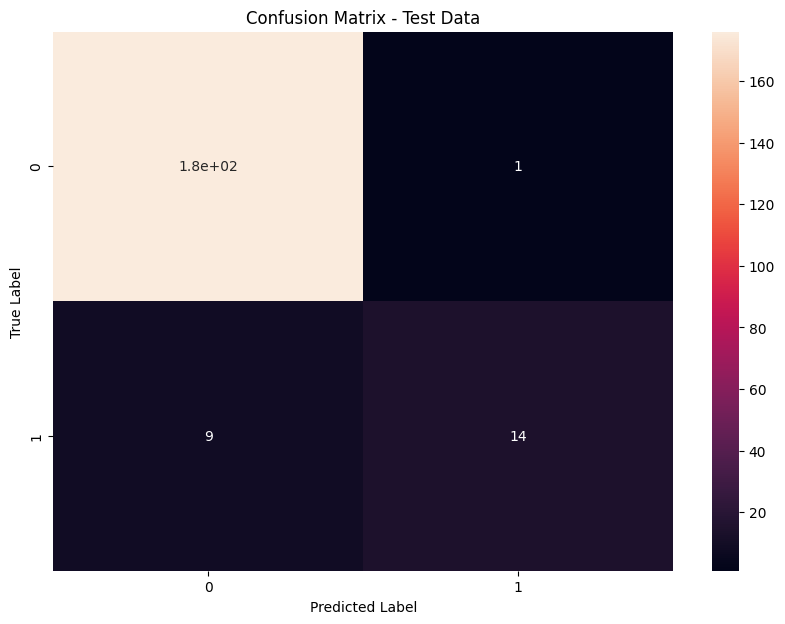

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**Calculate common error metrics for a 2-class classifier**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       177
           1       0.93      0.61      0.74        23

    accuracy                           0.95       200
   macro avg       0.94      0.80      0.85       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       177
           1       0.93      0.61      0.74        23

    accuracy                           0.95       200
   macro avg       0.94      0.80      0.85       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
# Calculate metrics values individually

# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [ ]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.6086956521739131


In [ ]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.9333333333333333


In [ ]:
 specificity = TN / (TN +FP)
 print("Specificity=",specificity)

Specificity= 0.9943502824858758


In [ ]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.95
